<a href="https://colab.research.google.com/github/WiratchawaKannika/DPDM65/blob/main/HomeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

# HW 2 

## หาพฤติกรรมของ Merge function ว่าเวลา Merge แล้ว Key ในตารางรองไม่ Unique มัน merge ยังไง

*(จำนวน row ของ project id นั้น เพิ่มขึ้นหรรือไม่)*

### Import Data

In [4]:
project_df = pd.read_csv('/content/drive/MyDrive/DPDM65/opendata_project.csv')
print(project_df.shape)  ##บอกขนาดของ DataFrame
project_df.head()

(23434, 45)


,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


In [38]:
#project_df[project_df['project_id']=='project_1347']

- จะเห็นว่าในตาราง Project id นั้น project id ไม่มีความเป็น unique

In [39]:
print('จำนวน Project id : ', len(project_df['project_id']))
print('จำนวน Project id ที่ unique :', len(list(set(project_df['project_id']))))

จำนวน Project id :  23434
จำนวน Project id ที่ unique : 19900


In [5]:
unit_df = pd.read_csv('/content/drive/MyDrive/DPDM65/opendata_unittype.csv')
print(unit_df.shape)  ##บอกขนาดของ DataFrame
unit_df.head()

(42625, 27)


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...


- จะเห็นว่าในตาราง unit_df นั้น project id ไม่มีความเป็น unique เช่นกัน

In [41]:
print('จำนวน Project id : ', len(unit_df['project_id']))
print('จำนวน Project id ที่ unique :', len(list(set(unit_df['project_id']))))

จำนวน Project id :  42625
จำนวน Project id ที่ unique : 20027


#### Merge(เอาตาราง 2 อันมารวมกัน)

In [6]:
merge_table = unit_df.merge(project_df, left_on='project_id', right_on='project_id')  ## unit_df เป็นตารางหลัก , project_id เป็น key
print(merge_table.shape)
merge_table.head()

(53729, 71)


,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,38108,unittype_18502,project_2446,1 Bedroom,2,Condo,คอนโด,NaN,24.0,1390000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
2,2396,unittype_9564,project_2446,1 Bedroom Plus,2,Condo,คอนโด,NaN,29.0,1990000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
3,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
4,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...


- จะเห็นว่า Key ที่ไม่มีความเป็น unique  ของแต่ละตาราง เมื่อนำมา Merge กัน แล้ว Key ก็ยังคงไม่มีความเป็น  unique เช่นเดิม 



- **พิสูจน์ได้จาก ทำการ Check ว่าในตารางที่ผ่านการ merge แล้ว ยังคงมี project id ซ้ำกันอยู่ ดังนี้** 

In [42]:
print('จำนวน Project id จากตารางที่ผ่านการ merge แล้ว:' , len(merge_table['project_id']))
print('จำนวน Project id ที่ unique จากตารางที่ผ่านการ merge แล้ว:' , len(list(set(merge_table['project_id']))))

จำนวน Project id จากตารางที่ผ่านการ merge แล้ว: 53729
จำนวน Project id ที่ unique จากตารางที่ผ่านการ merge แล้ว: 19899


#### Check หา project id ที่ซ้ำในตารางที่ผ่านการ merge แล้ว 

In [19]:
dup = merge_table[merge_table.duplicated('project_id')]
print(dup.shape)
dup

(33830, 71)


,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
1,38108,unittype_18502,project_2446,1 Bedroom,2,Condo,คอนโด,NaN,24.0,1390000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
2,2396,unittype_9564,project_2446,1 Bedroom Plus,2,Condo,คอนโด,NaN,29.0,1990000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
4,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
5,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
6,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.70,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53445,8011,unittype_36229,project_15527,1 Bedroom,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,1.0,NaN,1.0,1.0,2019-05-29 09:47:12,2014-01-02 07:00:00,2022-05-24 16:00:10,baania,https://baania.com/th/project/ริชพาร์ค-2-แอท-เ...
53452,13732,unittype_40316,project_17569,ไดมอนด์,3,Townhome,ทาวน์โฮม,NaN,117.0,3990000.0,...,NaN,1.0,NaN,1.0,1.0,2020-02-07 11:06:26,2020-01-01 07:00:00,2021-04-30 18:00:04,baania,https://baania.com/th/project/โกลเด้น-ทาวน์-เฉ...
53477,31922,unittype_31037,project_13077,ทาวน์โฮมชั้นเดียว,3,Townhome,ทาวน์โฮม,21.75,87.0,NaN,...,0.0,1.0,0.0,0.0,1.0,2018-03-29 09:34:03,1970-01-02 07:00:00,2020-12-04 10:41:37,baania,https://baania.com/th/project/พารากอน-เซ็นทรัล...
53478,31921,unittype_31036,project_13077,โฮมออฟฟิศสองชั้น,6,Home office,โฮมออฟฟิศ,18.00,120.0,NaN,...,0.0,1.0,0.0,0.0,1.0,2018-03-29 09:34:03,1970-01-02 07:00:00,2020-12-04 10:41:37,baania,https://baania.com/th/project/พารากอน-เซ็นทรัล...


In [20]:
col = list(merge_table.columns)
#col
Data_dup = pd.DataFrame(columns=col)
#Data_dup
lst_site_pid = list(set(dup['project_id']))
for j in range(len(lst_site_pid)):
    data = merge_table[merge_table['project_id']==lst_site_pid[j]]
    Data_dup = Data_dup.append(data)

print(Data_dup.shape)
Data_dup

(44214, 71)


,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
45089,29531,unittype_19964,project_7845,1 Bedroom,2,Condo,คอนโด,NaN,29.00,2700000.0,...,NaN,1.0,NaN,1.0,1.0,2017-06-21 09:43:23,1970-01-02 07:00:00,2020-12-04 10:41:01,baania,https://baania.com/th/project/ชาโตว์-อินทาวน์-...
45090,25382,unittype_19965,project_7845,2 Bedroom,2,Condo,คอนโด,NaN,42.00,3644000.0,...,NaN,1.0,NaN,1.0,1.0,2017-06-21 09:43:23,1970-01-02 07:00:00,2020-12-04 10:41:01,baania,https://baania.com/th/project/ชาโตว์-อินทาวน์-...
28934,21912,unittype_7046,project_2346,LX 03 Hideaway Zone,3,Townhome,ทาวน์โฮม,16.0,97.00,17000000.0,...,0.0,1.0,1.0,1.0,1.0,2016-10-11 14:55:27,2016-12-31 07:00:00,2020-12-04 10:44:42,baania,https://baania.com/th/project/พฤกษาไลท์-ล็อกซ์...
28935,26532,unittype_7045,project_2346,LX 01,3,Townhome,ทาวน์โฮม,18.5,108.00,1700000.0,...,0.0,1.0,1.0,1.0,1.0,2016-10-11 14:55:27,2016-12-31 07:00:00,2020-12-04 10:44:42,baania,https://baania.com/th/project/พฤกษาไลท์-ล็อกซ์...
2828,36236,unittype_28857,project_9529,1 Bedroom Type A+,2,Condo,คอนโด,NaN,48.00,2990000.0,...,0.0,1.0,0.0,1.0,1.0,2017-09-07 13:35:48,2015-12-31 07:00:00,2020-12-04 10:31:11,baania,https://baania.com/th/project/อาร์ท-ออน-เดอะฮิ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34133,16125,5ec4973f84c1860019f32dbe,5ec495d984c1860019f32db5,โฮมออฟฟิศสองชั้นครึ่ง,6,Home office,โฮมออฟฟิศ,NaN,193.08,2980000.0,...,NaN,1.0,NaN,1.0,1.0,2020-05-20 09:28:41,2016-01-01 07:00:00,2020-12-04 10:32:50,baania,https://baania.com/th/project/นราวัลย์-วังน้อย...
34134,16123,5ec4965484c1860019f32db8,5ec495d984c1860019f32db5,นราวัลลีย์,1,Detached House,บ้าน,NaN,140.00,3640000.0,...,NaN,1.0,NaN,1.0,1.0,2020-05-20 09:28:41,2016-01-01 07:00:00,2020-12-04 10:32:50,baania,https://baania.com/th/project/นราวัลย์-วังน้อย...
34135,16123,5ec4965484c1860019f32db8,5ec495d984c1860019f32db5,นราวัลลีย์,1,Detached House,บ้าน,NaN,140.00,3640000.0,...,NaN,1.0,NaN,1.0,1.0,2020-05-20 09:28:41,2016-01-01 07:00:00,2020-12-04 10:32:50,baania,https://baania.com/th/project/นราวัลย์-วังน้อย...
34136,16124,5ec496c584c1860019f32dbb,5ec495d984c1860019f32db5,นรามณี,1,Detached House,บ้าน,NaN,110.00,2950000.0,...,NaN,1.0,NaN,1.0,1.0,2020-05-20 09:28:41,2016-01-01 07:00:00,2020-12-04 10:32:50,baania,https://baania.com/th/project/นราวัลย์-วังน้อย...


# **สรุป** พฤติกรรมของ Merge function ว่าเวลา Merge แล้ว Key ในตารางรองไม่ Unique

**การ Merge ตารางเมื่อตารางรองมี Key ไม่ Unique**

**ในกรณีนี้ ตารางหลักก็มี key ไม่ Unique เช่นกัน**

- เมื่อทำการ Merge ตารางแล้ว ตารางหลัก(ทางซ้าย)และตารางรอง(ทางขวา)จะนำ Key ที่มีเเหมือนกันมาสร้างเป็นตารางใหม่เท่านั้น โดยเป็นการนำ Columns จากแต่ละตารางที่มีชื่อไม่เหมือนกันมาเรียงต่อกันตามจำนวนแถวของตารางใหม่

> **ตารางหลัก (มี Key เหมือนตารางรอง)**

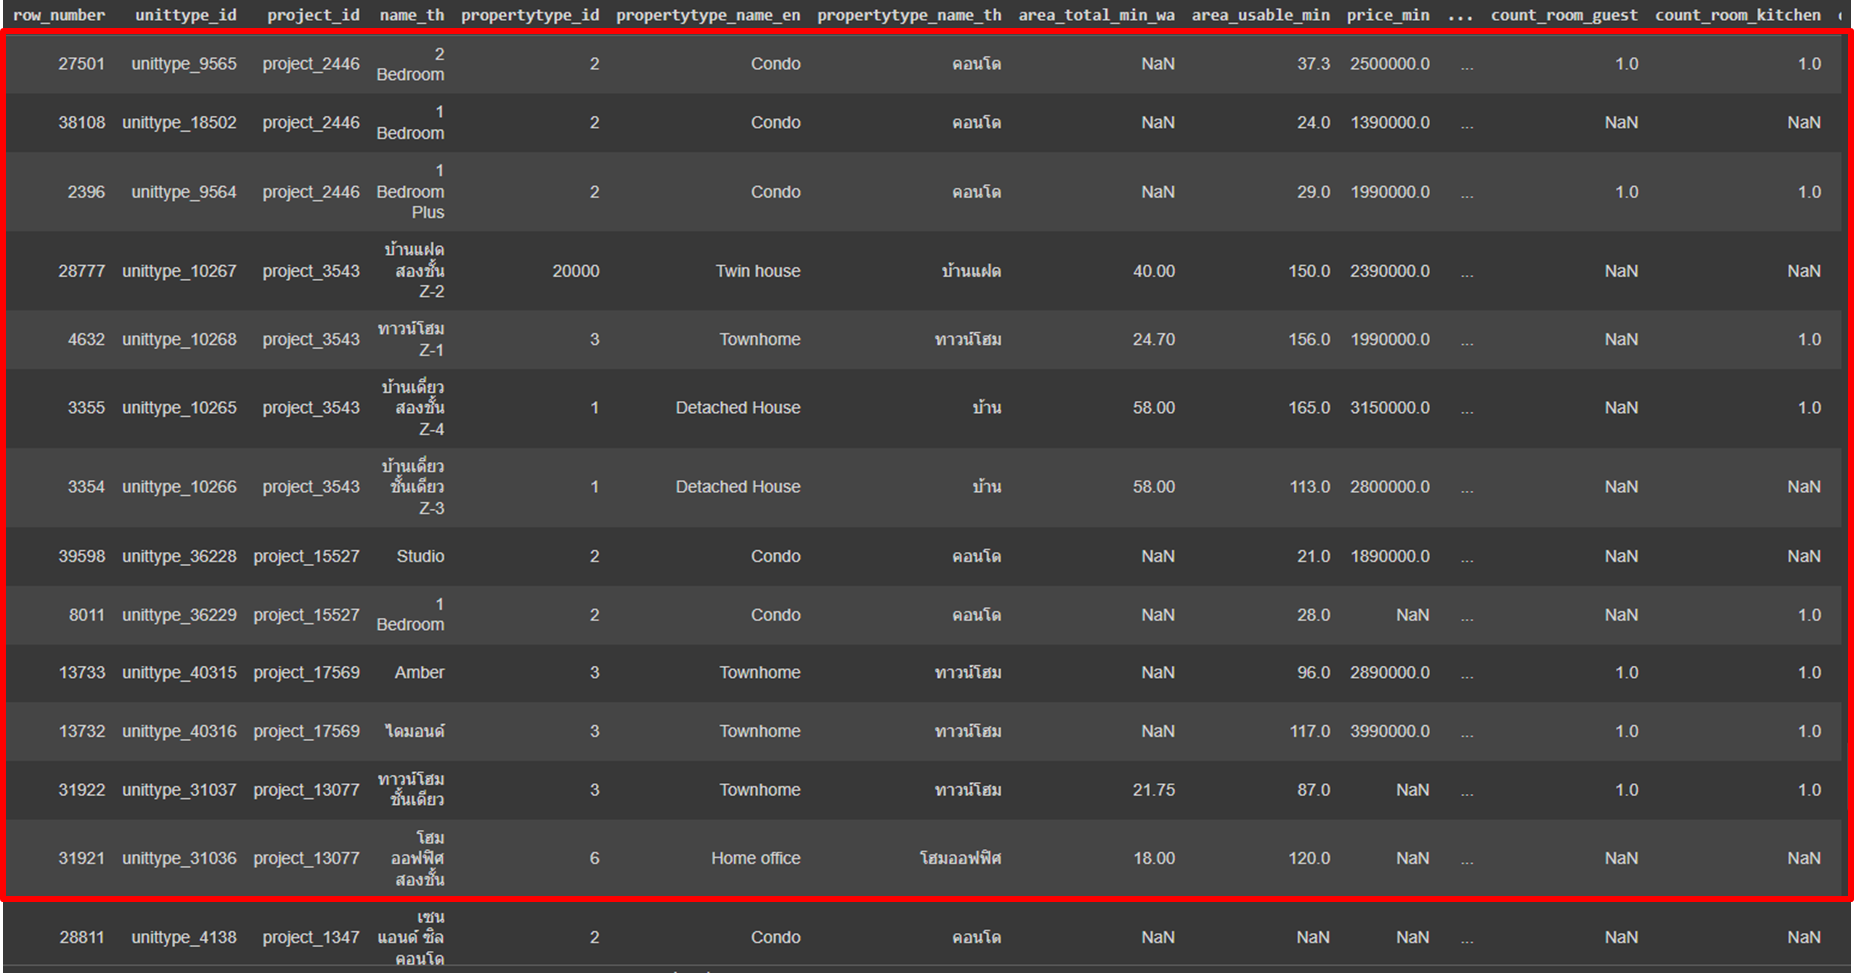

> **ตารางรอง (มี Key เหมือนตารางหลัก)**

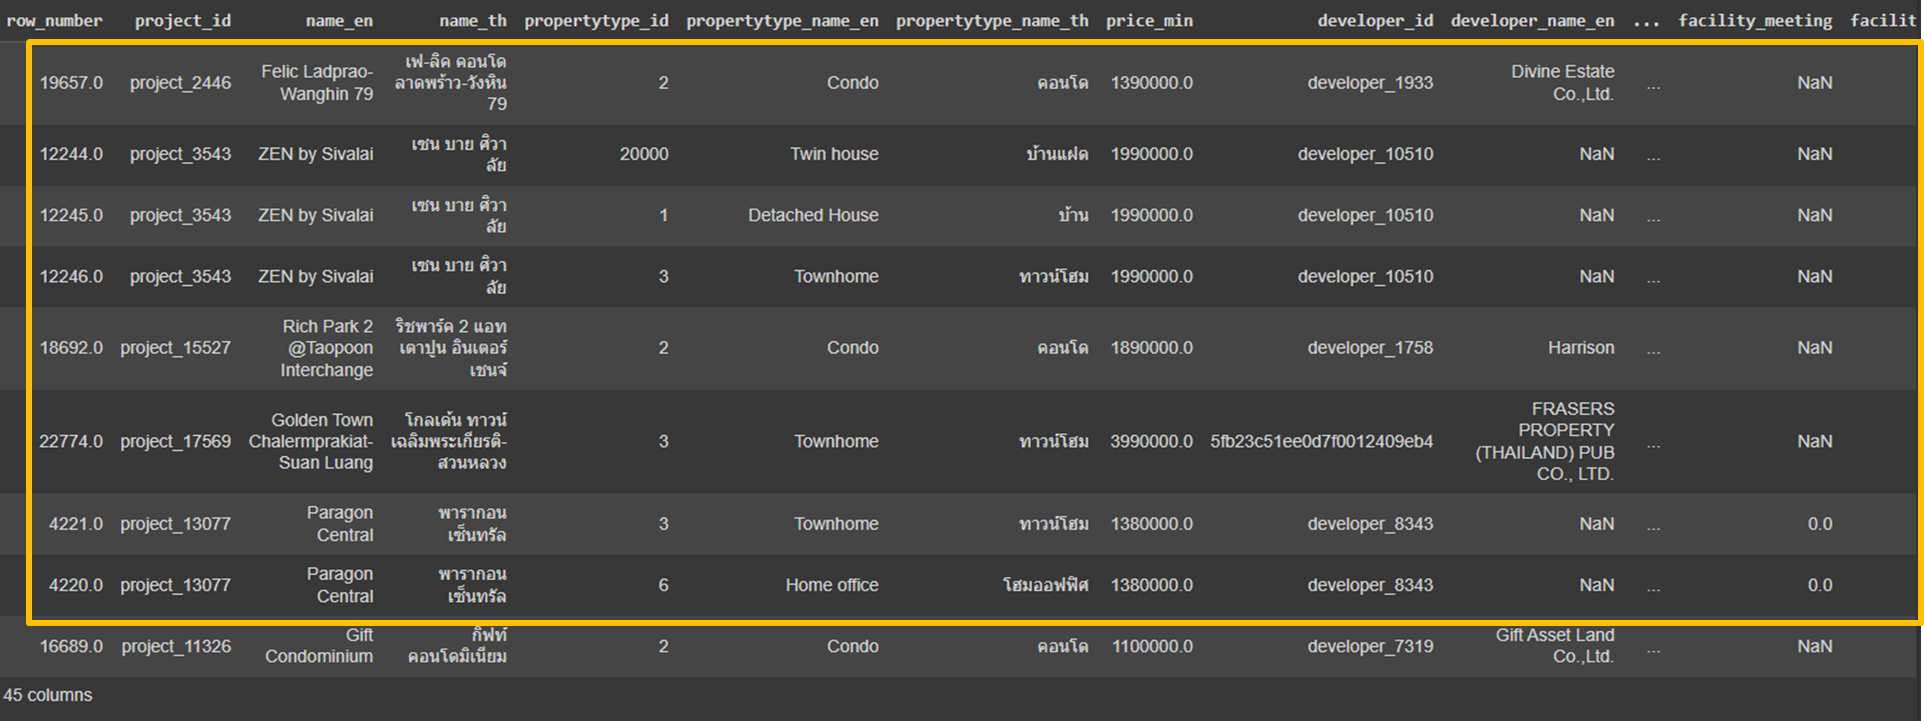

- จากภาพด้านบน จะเห็นว่าเมื่อแต่ละตารางมี Key ที่ไม่เหมือนกัน Key นั้น จะไม่ถูกนำมาพิจารณาในการสร้างตารางใหม่

- ดังนั้น เมื่อตารางรองมี Key ที่ไม่ Unique เช่นเดียวกีบตารางหลัก และค่าในแต่ละฟิลด์ของตารางรองแตกต่างกันในแต่ละแถวที่มี Key เหมือนกัน ตารางรองจะถูกกระจาย Columns ทั้งหมดมาต่อกับทุกแถวของตารางหลักที่ทั้ง 2 ตาราง มี Key เหมือนกัน โดยจำนวนแถวจะเพิ่มขึ้นด้วยหากค่าในฟิลด์ของตารางหลักแตกต่างกันในแต่ละแถว

>> เช่น ตารางหลักมี Key ที่ซ้ำกัน ถูกแบ่งเป็น 2 แถวเนื่องจากค่าในบางฟิลด์ไม่เหมือนกัน และตารางรองมี Key ที่ซ้ำกันก็ถูกแบ่งเป็น 2 แถวเช่นกัน นั่นคือ ตารางรองจะถูกนำ Columns ไปกระจายต่อกับ Columns ของตารางหลักเพิ่มจำนวนแถวในตารางใหม่เป็น 4 แถว เป็นต้น 


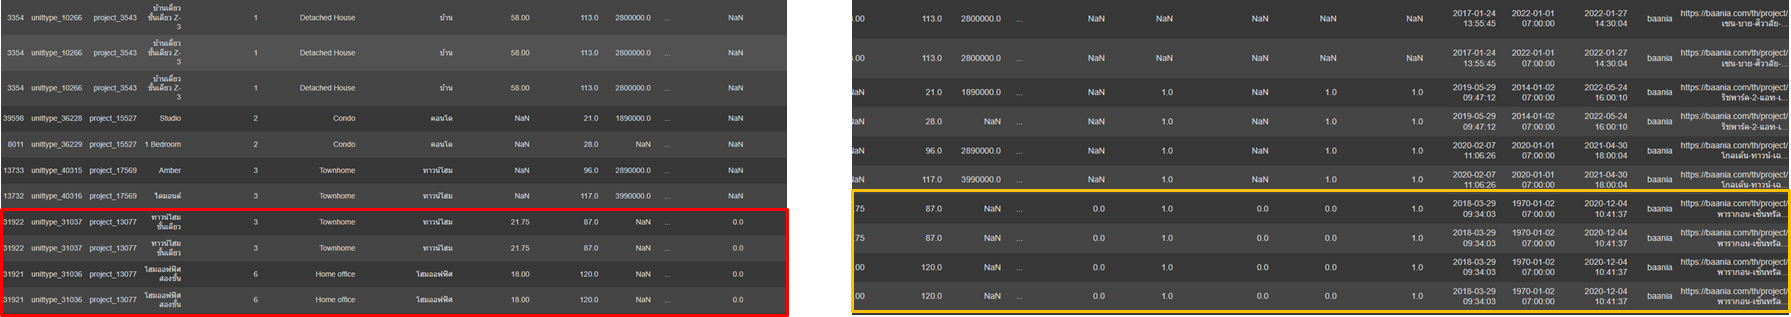

- จำนวนแถวของแต่ละ Key ในตารางใหม่ จะได้มาจาก = จำนวนแถวที่มี Key ซ้ำกันในตารางหลัก X จำนวนแถวที่มี Key ซ้ำกันในตารางรอง


--------------------

In [30]:
col = list(project_df.columns)
#col
Data_df = pd.DataFrame(columns=col)
#Data_dup
lst_id = ['project_2446', 'project_3543', 'project_15527', 'project_17569', 'project_13077','project_11326']
for j in range(len(lst_id)):
    data = project_df[project_df['project_id']==lst_id[j]]
    Data_df = Data_df.append(data)

print(Data_df.shape)
Data_df

(9, 45)


,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
7177,19657.0,project_2446,Felic Ladprao-Wanghin 79,เฟ-ลิค คอนโด ลาดพร้าว-วังหิน 79,2,Condo,คอนโด,1390000.0,developer_1933,"Divine Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
4633,12244.0,project_3543,ZEN by Sivalai,เซน บาย ศิวาลัย,20000,Twin house,บ้านแฝด,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
5600,12245.0,project_3543,ZEN by Sivalai,เซน บาย ศิวาลัย,1,Detached House,บ้าน,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
18199,12246.0,project_3543,ZEN by Sivalai,เซน บาย ศิวาลัย,3,Townhome,ทาวน์โฮม,1990000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
4088,18692.0,project_15527,Rich Park 2 @Taopoon Interchange,ริชพาร์ค 2 แอท เตาปูน อินเตอร์เชนจ์,2,Condo,คอนโด,1890000.0,developer_1758,Harrison,...,NaN,1.0,NaN,1.0,1.0,2019-05-29 09:47:12,2014-01-02 07:00:00,2022-05-24 16:00:10,baania,https://baania.com/th/project/ริชพาร์ค-2-แอท-เ...
4942,22774.0,project_17569,Golden Town Chalermprakiat-Suan Luang,โกลเด้น ทาวน์ เฉลิมพระเกียรติ-สวนหลวง,3,Townhome,ทาวน์โฮม,3990000.0,5fb23c51ee0d7f0012409eb4,"FRASERS PROPERTY (THAILAND) PUB CO., LTD.",...,NaN,1.0,NaN,1.0,1.0,2020-02-07 11:06:26,2020-01-01 07:00:00,2021-04-30 18:00:04,baania,https://baania.com/th/project/โกลเด้น-ทาวน์-เฉ...
24,4221.0,project_13077,Paragon Central,พารากอน เซ็นทรัล,3,Townhome,ทาวน์โฮม,1380000.0,developer_8343,NaN,...,0.0,1.0,0.0,0.0,1.0,2018-03-29 09:34:03,1970-01-02 07:00:00,2020-12-04 10:41:37,baania,https://baania.com/th/project/พารากอน-เซ็นทรัล...
899,4220.0,project_13077,Paragon Central,พารากอน เซ็นทรัล,6,Home office,โฮมออฟฟิศ,1380000.0,developer_8343,NaN,...,0.0,1.0,0.0,0.0,1.0,2018-03-29 09:34:03,1970-01-02 07:00:00,2020-12-04 10:41:37,baania,https://baania.com/th/project/พารากอน-เซ็นทรัล...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...


In [34]:
col = list(unit_df.columns)
#col
Data_unit = pd.DataFrame(columns=col)
#Data_dup
lst_id = ['project_2446', 'project_3543', 'project_15527', 'project_17569', 'project_13077','project_1347']
for j in range(len(lst_id)):
    data = unit_df[unit_df['project_id']==lst_id[j]]
    Data_unit = Data_unit.append(data)

print(Data_unit.shape)
Data_unit

(14, 27)


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
7194,38108,unittype_18502,project_2446,1 Bedroom,2,Condo,คอนโด,NaN,24.0,1390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
19770,2396,unittype_9564,project_2446,1 Bedroom Plus,2,Condo,คอนโด,NaN,29.0,1990000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
28480,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.70,156.0,1990000.0,...,NaN,1.0,NaN,NaN,NaN,NaN,2022-01-27 14:30:03,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
38009,3355,unittype_10265,project_3543,บ้านเดี่ยวสองชั้น Z-4,1,Detached House,บ้าน,58.00,165.0,3150000.0,...,NaN,1.0,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
38748,3354,unittype_10266,project_3543,บ้านเดี่ยวชั้นเดียว Z-3,1,Detached House,บ้าน,58.00,113.0,2800000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
41312,39598,unittype_36228,project_15527,Studio,2,Condo,คอนโด,NaN,21.0,1890000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-24 16:00:10,2022-05-24 15:21:09,baania,https://baania.com/th/project/ริชพาร์ค-2-แอท-เ...
41729,8011,unittype_36229,project_15527,1 Bedroom,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,2022-05-24 15:30:04,2022-05-24 15:20:34,baania,https://baania.com/th/project/ริชพาร์ค-2-แอท-เ...
41362,13733,unittype_40315,project_17569,Amber,3,Townhome,ทาวน์โฮม,NaN,96.0,2890000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:31:33,2021-04-30 17:34:39,baania,https://baania.com/th/project/โกลเด้น-ทาวน์-เฉ...


In [35]:
merge_table_ = Data_unit.merge(Data_df, left_on='project_id', right_on='project_id')  ## unit_df เป็นตารางหลัก , project_id เป็น key
print(merge_table_.shape)
merge_table_

(23, 71)


,row_number_x,unittype_id,project_id,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,38108,unittype_18502,project_2446,1 Bedroom,2,Condo,คอนโด,NaN,24.0,1390000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
2,2396,unittype_9564,project_2446,1 Bedroom Plus,2,Condo,คอนโด,NaN,29.0,1990000.0,...,NaN,1.0,NaN,1.0,1.0,2016-11-10 16:56:40,2018-01-01 07:00:00,2021-11-19 18:00:09,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
3,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
4,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
5,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.00,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
6,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.70,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
7,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.70,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
8,4632,unittype_10268,project_3543,ทาวน์โฮม Z-1,3,Townhome,ทาวน์โฮม,24.70,156.0,1990000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
9,3355,unittype_10265,project_3543,บ้านเดี่ยวสองชั้น Z-4,1,Detached House,บ้าน,58.00,165.0,3150000.0,...,NaN,NaN,NaN,NaN,NaN,2017-01-24 13:55:45,2022-01-01 07:00:00,2022-01-27 14:30:04,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
